<a href="https://colab.research.google.com/github/igor-stefan/disciplina_controle1_EE2021/blob/main/Projeto2_Controle1__20211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control #comando para instalar a biblioteca control
import numpy as np #para trabalhar com números e funções entre números
import matplotlib.pyplot as plt #para gerar gráficos
import control as co #para utilizar as ferramentas de sistemas de controle
import scipy.signal as sps #para calcular o resíduo

#a) Classificação do sistema

In [ ]:
''' Função para classificar o sistema '''
''' Se |x - y| < eps, então x é igual a y '''
eps = 1e-9
def classificar_sistema(x):
  if np.abs(x - 0) < eps: #x é igual a 0
    print('Sistema sem amortecimento')
  elif np.abs(x - 1) < eps: #x é igual 1
    print('Sistema com amortecimento crítico')
  elif x > 1: #x é maior que 1 (é segura fazer essa comparação agora)
    print('Sistema superamortecido')
  else: #se nenhuma das condições anteriores aconteceram, então x está entre 0 e 1
    print('Sistema subamortecido')


In [ ]:
'''Coeficientes do denominador'''
a = 1
b = 5.25
c = 6.25

'''Definindo a função de transferência'''
num = [(2.8 * c)]; #coeficientes do numerador
den = [a, b, c]; #coeficientes do denominador
G1 = co.tf(num, den); #G1 armazena a função de transfrência do sistema
[FP, R, K] = sps.residue(num, den) #computa os coeficientes das
'''Mostrando os resultados'''
print("Função de transferência:\n", G1); #mostra a função de transferência
wn = np.sqrt(c) #calcula wn
csi = b/(2 * wn) #calcula csi
print("Frequência natural (Wn): ", wn, "rad/s\n\nCoeficiente de amortecimento(Csi): ",csi,"\n")
classificar_sistema(csi) #classifica o sistema

Função de transferência:
 
       17.5
-------------------
s^2 + 5.25 s + 6.25

Frequência natural (Wn):  2.5 rad/s

Coeficiente de amortecimento(Csi):  1.05 

Sistema superamortecido


#b) Aplicando sinal degrau na entrada
O sistema é superamortecido, portanto não há relevância em calcular o *overshoot* e o tempo de pico.
Foi aplicado um degrau na entrada do circuito. A nova função de transferência é mostrada abaixo.


In [ ]:
#aplicando o degrau na entrada
'''Coeficientes do denominador e amplitude'''
a = 1
b = 5.25
c = 6.25
amp = 2.4

'''Definindo a função de transferência'''
num = [(2.8 * c * amp)]; #coeficientes do numerador
den = [a, b, c, 0]; #coeficientes do denominador
G2 = co.tf(num, den); #G1 armazena a função de transfrência do sistema

'''Mostrando os resultados'''
print("Função de transferência:\n", G2); #mostra a função de transferência
wn = np.sqrt(c) #calcula wn
csi = b/(2 * wn) #calcula csi
print("Frequência natural (Wn): ", wn, "rad/s\n\nCoeficiente de amortecimento(Csi): ",csi,"\n")
classificar_sistema(csi) #funcao que classifica o sistema

Função de transferência:
 
          42
-----------------------
s^3 + 5.25 s^2 + 6.25 s

Frequência natural (Wn):  2.5 rad/s

Coeficiente de amortecimento(Csi):  1.05 

Sistema superamortecido


#Função inversa de Laplace
Foi encontrada a seguinte função inversa:

$$V_0(t) = -14.38 \cdot e^{-1.82t} + 7.66 \cdot e^{-3.43t} + 6.72$$

O valor máximo desta função é:
$$V_0(\infty) = 6.72$$

Portanto, como os valores dos tempos de atraso, de subida e de acomodação são definidos a partir de uma quantidade (em porcentagem) do valor final, escreve-se:

$$V_0(t, x) = -14.38 \cdot e^{-1.82t} + 7.66 \cdot e^{-3.43t} + 6.72 - 6.72 \cdot x$$


In [ ]:
[FP, R, K] = sps.residue(num, den); #calcula o resíduo da função de transferência e armazena em "FP"
print("Coeficientes frações parciais => ", FP); #mostra os resíduos

Coeficientes frações parciais =>  [  6.72       -14.37962064   7.65962064]


In [ ]:
def ft_tempo(t, pct): #esta funcao será utilizada para calcular cada um dos tempos
  return -14.38 * np.exp(-1.82 * t) + 7.66 * np.exp(-3.43 * t) + 6.72 - 6.72 * pct

#Método para encontrar raízes de uma função

In [ ]:
''' Método da bisseção ou busca binária para encontrar raízes da função '''
def bissec(x1,x2,max_it,eps,f, pct):
  xm = []
  it = 0
  erro = [];
  if (f(x1, pct) * f(x2, pct) > 0):
    print("Não é possível calcular as raízes com os valores de x1 e x2 dados");
    return;
  for i in range(max_it):
    it += 1
    xm.append((x1 + x2) / 2)
    if f(x1, pct) * f(xm[i], pct) < 0:
      x2 = xm[i]
    else:
      x1 = xm[i]
    if i:
      erro.append((np.abs((xm[i] - xm[i - 1]) / xm[i])) * 100)
      if erro[-1] < eps:
        break
  return xm[-1]

#Tempo de atraso (td)
O tempo de atraso (td) é o tempo necessário para a resposta ao degrau alcançar metade do valor final.


In [ ]:
eps = 5e-5 #definindo valor de erro para finalizar a busca da raíz
itr = 1500 #máximo de 1500 iterações
x1 = 0.0 #valor de início
x2 = 10 #valor final
pct = .5 #50%

td = bissec(x1,x2,itr,eps, ft_tempo, pct)
print(f'{td:.3f}', "segundos")

0.694 segundos


#Tempo de subida (tr)
Tempo necessário para a resposta ao degrau atingir de 10% a 90% do seu valor máximo.

In [ ]:
eps = 5e-5 #definindo valor de erro para finalizar a busca da raíz
itr = 1500 #máximo de 1500 iterações
x1 = 0.0 #valor de início
x2 = 10 #valor final
pct1 = .1 #10%
pct2 = .9 #90%

tr1 = bissec(x1,x2,itr, eps, ft_tempo, pct1)
tr2 = bissec(x1,x2,itr, eps, ft_tempo, pct2)
tr = tr2 - tr1
print(f'{tr:.2f}', "segundos")

1.45 segundos


#Tempo de acomodação (ts)
É o tempo necessário para que a resposta ao degrau permaneça dentro de uma faixa de tolerância, geralmente a faixa é de 2% e 5%.

In [ ]:
eps = 5e-5 #definindo valor de erro para finalizar a busca da raíz
itr = 1500 #máximo de 1500 iterações
x1 = 0.0 #valor de início
x2 = 10 #valor final
pct1 = .98 #2% ocorre quando o sinal atingiu 98% do valor máximo
pct2 = .95 #5% ocorre quando o sinal atingiu 95% do valor máximo

ts1 = bissec(x1,x2,itr, eps, ft_tempo, pct1) #calculando o tempo para 2%
ts2 = bissec(x1,x2,itr, eps, ft_tempo, pct2) #calculando o tempo para 5%
print("Faixa de tolerância de 2% =", f'{ts1:.2f}', "segundos")
print("Faixa de tolerância de 5% =", f'{ts2:.2f}', "segundos")


Faixa de tolerância de 2% = 2.56 segundos
Faixa de tolerância de 5% = 2.05 segundos


#c) Adicionando Pólos e Zeros ao sistema

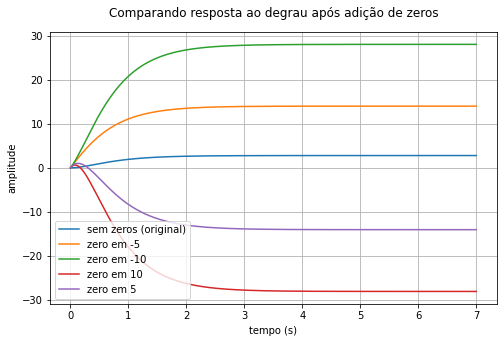

In [ ]:
#adicionando zeros
s = co.tf('s')
'''Coeficientes do numerador'''
x1 = 2.8 * 6.25

'''Coeficientes do denominador'''
den = (s**2 + 5.25*s + 6.25)


F1 = x1 * (s + 5) / den #cria novo sis. adicionando zero em -5
F2 = x1 * (s + 10) / den #cria novo sis. adicionando zero em -10
F3 = x1 * (s - 10) / den #cria novo sis. adicionando zero em 10
F4 = x1 * (s - 5) / den #cria novo sis. adicionando zero em 5
tempo = np.linspace(0, 7, 10000) #vetor com o tempo de simulação 


tf0, rf0 = co.step_response(G1, tempo) #computa resposta ao degrau
tf1, rf1 = co.step_response(F1, tempo)
tf2, rf2 = co.step_response(F2, tempo)
tf3, rf3 = co.step_response(F3, tempo)
tf4, rf4 = co.step_response(F4, tempo)

plt.figure(figsize=[8,5]) 
plt.plot(tf0,rf0, label='sem zeros (original)')
plt.plot(tf1,rf1, label='zero em -5')
plt.plot(tf2,rf2, label='zero em -10')
plt.plot(tf3,rf3, label='zero em 10')
plt.plot(tf4,rf4, label='zero em 5')

plt.title("Comparando resposta ao degrau após adição de zeros", pad=15)
plt.legend(loc='best')
plt.ylabel("amplitude", labelpad=5)
plt.xlabel("tempo (s)", labelpad=5)

plt.grid(1)
plt.show()



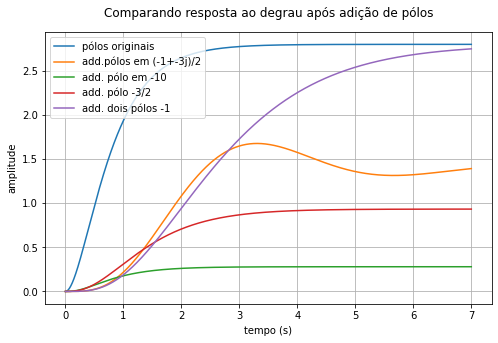

In [ ]:
#adicionando pólos
'''Coeficientes do numerador'''
x1 = 2.8 * 6.25

'''Coeficientes do denominador'''
den = (s**2 + 5.25*s + 6.25) #denominador original
den1 = den * (s**2 + s + 2) #adicionado polo em )-+1+-3j)/2
den2 = den * (s + 10) #adicionado polo em -10
den3 = den * (2*s + 3) #adicionado polo em -3/2
den4 = den * (s**2 + 2*s + 1) #adicionado dois pólos em -1

F1 = x1/den1 #cria novo sistema com pólos adicionados
F2 = x1/den2 
F3 = x1/den3 
F4 = x1/den4 
tempo = np.linspace(0, 7, 10000) #7 segundos


tf0, rf0 = co.step_response(G1, tempo) #computa resposta ao degrau
tf1, rf1 = co.step_response(F1, tempo)
tf2, rf2 = co.step_response(F2, tempo)
tf3, rf3 = co.step_response(F3, tempo)
tf4, rf4 = co.step_response(F4, tempo)


plt.figure(figsize=[8,5]) #para plot
plt.plot(tf0,rf0, label='pólos originais')
plt.plot(tf1,rf1, label='add.pólos em (-1+-3j)/2')
plt.plot(tf2,rf2, label='add. pólo em -10')
plt.plot(tf3,rf3, label='add. pólo -3/2')
plt.plot(tf4,rf4, label='add. dois pólos -1')


plt.title("Comparando resposta ao degrau após adição de pólos", pad=15)
plt.legend(loc='best')
plt.ylabel("amplitude", labelpad=5)
plt.xlabel("tempo (s)", labelpad=5)
plt.grid(1)
plt.show()



#d) Ganho K para sistema em malha fechada apresentar *overshoot* de 10%
Foi calculado o valor de K para que o sistema tivesse o *overshoot* máximo de 10%. O valor de K encontrado foi de 0.78 ($K = 0.78$). O cálculo do valor do *overshoot* confirma que este é o valor correto. A precisão utilizada foi de duas casas decimais.

In [ ]:
k = .78 #ganho calculado
print("G1: 'Sistema da malha aberta'\n", G1) #mostra o sistema g1
G3 = co.feedback(G1 * k, 1) #G3 é o sistema G1 com realimentação unitária (malha fechada)
print("\nG3: 'G1 com realimentação'\n", G3)
a = G3.den[0][0][0] #capta o coeficiente a do denominador
b = G3.den[0][0][1] #capta o coeficiente b do denominador
c = G3.den[0][0][2] #capta o coeficiente c do denominador

wn = np.sqrt(c) #calcula wn
csi = b/(2 * wn) #calcula csi
overshoot = np.exp(-csi*np.pi/np.sqrt(1-csi*csi)) #calcula o valor do overshoot
print("Valores para G3:")
print("Frequência natural (Wn): ", wn, "rad/s\n\nCoeficiente de amortecimento(Csi): ",csi,"\n\nOvershoot: ", overshoot, "\n")
classificar_sistema(csi) #classifica o sistema

G1: 'Sistema da malha aberta'
 
       17.5
-------------------
s^2 + 5.25 s + 6.25


G3: 'G1 com realimentação'
 
       13.65
-------------------
s^2 + 5.25 s + 19.9

Valores para G3:
Frequência natural (Wn):  4.460941604639093 rad/s

Coeficiente de amortecimento(Csi):  0.5884407895566641 

Overshoot:  0.10163234548143217 

Sistema subamortecido


#e) Diagrama de pólos e zeros em malha aberta e em malha fechada

Polos(G1) = [-3.42539053 -1.82460947]
Zeros(G1) = []
Polos(G3) = [-2.625+3.60685112j -2.625-3.60685112j]
Zeros(G3) = [] 




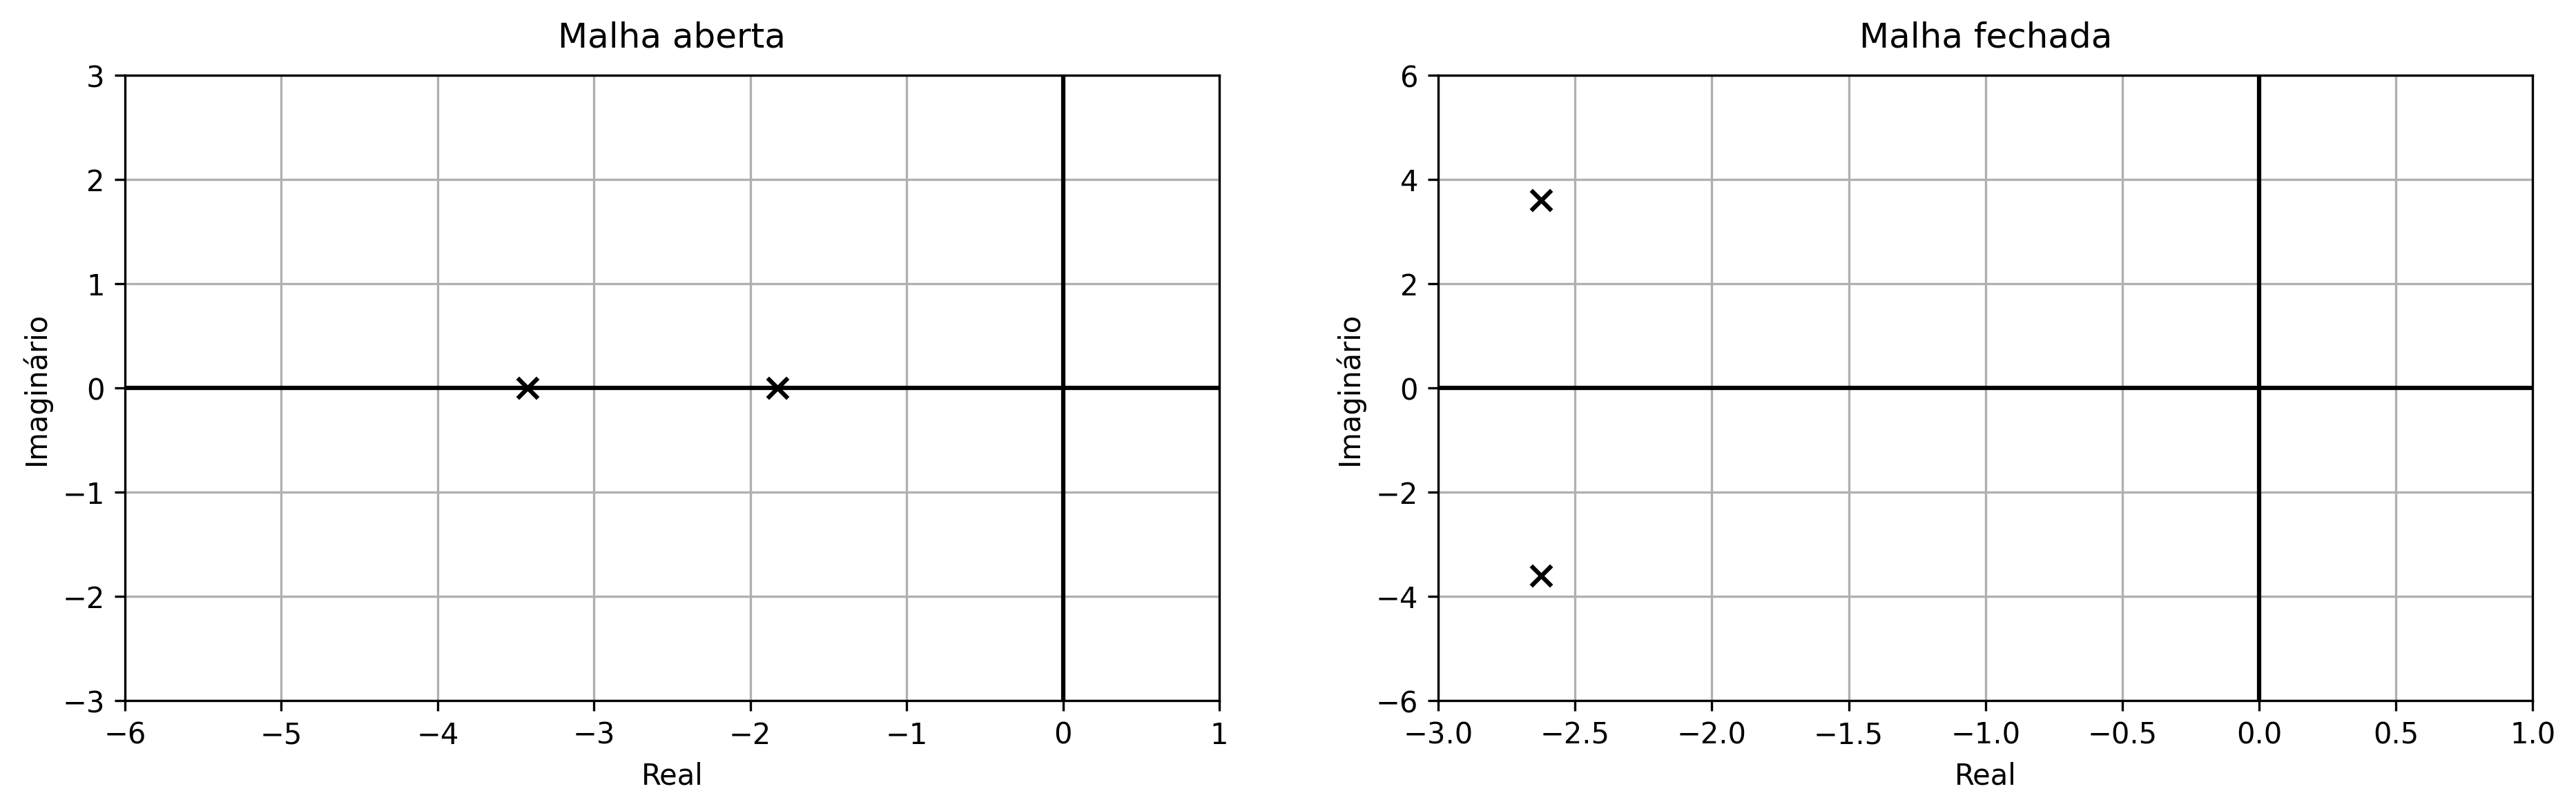

In [ ]:
fig1 = plt.figure(figsize=(15, 4), dpi = 300.0)
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

polos, zeros = co.pzmap(G1, plot = 0) #função computa os pólos e zeros
print("Polos(G1) =", polos); #exibe os pólos retornados pela função
print("Zeros(G1) =", zeros); #exibe os zeros retornados pela função
ax1.set_title("Malha aberta", pad = 10) #adiciona título ao gráfico
ax1.set_ylim(-3, 3); #configura limites de exibição das ordenadas
ax1.set_xlim(-6, 1); #configura limites de exibção das abscissas
ax1.set_ylabel('Imaginário'); #nome do eixo das ordenadas
ax1.set_xlabel('Real'); #nome do eixo das abscissas
ax1.axhline(0, c='k')
ax1.axvline(0, c='k')
ax1.grid(1)
if len(polos) > 0: #verifica se há polos
            ax1.scatter(np.real(polos), np.imag(polos), s = 50, marker='x', facecolors='k') #marca os pólos no gráfico
if len(zeros) > 0: #verifica se há zeros
            ax1.scatter(np.real(zeros), np.imag(zeros), s = 50, marker='o', facecolors='none', edgecolors='k') #marca os zeros no gráfico

polos1, zeros1 = co.pzmap(G3, plot = 0) #função computa os pólos e zeros
print("Polos(G3) =", polos1); #exibe os pólos retornados pela função
print("Zeros(G3) =", zeros1,"\n\n"); #exibe os zeros retornados pela função
ax2.set_title("Malha fechada", pad = 10) #adiciona título ao gráfico
ax2.set_ylim(-6, 6); #configura limites de exibição das ordenadas
ax2.set_xlim(-3, 1); #configura limites de exibção das abscissas
ax2.set_ylabel('Imaginário'); #nome do eixo das ordenadas
ax2.set_xlabel('Real'); #nome do eixo das abscissas
ax2.axhline(0, c='k')
ax2.axvline(0, c ='k')
ax2.grid(1)
if len(polos) > 0: #verifica se há polos
            ax2.scatter(np.real(polos1), np.imag(polos1), s = 50, marker='x', facecolors='k') #marca os pólos no gráfico
if len(zeros) > 0: #verifica se há zeros
            ax2.scatter(np.real(zeros1), np.imag(zeros1), s = 50, marker='o', facecolors='none', edgecolors='k') #marca os zeros no gráfico
